In [1]:
import sys
sys.path.append('../')
from datasets.simulated.data_generators import UniformDataGenerator
import matplotlib.pyplot as plt

## Data generator: UniformLookupTable

### General information

#### Hyperparameters

- `v`: Number of different words in vocabulary
- `k`: Number of words that get decoded into each representation
- `d`: Dimensionality of final representation
- `granularity`: Step size between 2 values in lookup table
- `noise_scale`: Multiplicative constant for noise sampled from Skellam distribution

#### Data Generation Method

At start:
- Generate a lookup table which maps each of the words $w_1, ..., w_v$ to a fixed representations $z_1, ..., z_v$ of size `int(d/k)`. The values in this lookup table are sampled from a discrete uniform distribution over [-1, 1] with step size `granularity`

Each time we generate:
- Sample $k$ words $w_1, ..., w_k$ from a discrete uniform distribution over $1,...,v$
- Decode each word $w_i$ into its representation $z_i$ using the lookup table and concatenate all the representations to get a final representation $z_{pure}$
- Add noise sampled from a Skellam distribution (discrete analogue of normal distribution) scaled by multiplying by `noise_scale` to $z_{pure}$ to obtain our final representation $z$
- Return $z$


### Compositionality metric

Our compositionality metric is $$Compositionality(Z) = \frac{K(W)}{K(p(z|w))} + 1$$

Let $N=2*\frac{1}{granularity}+1$ be the total number of distinct values in the lookup table

where in this case $K(p(z|w))$ is given by $log(\frac{vNd}{k})$ and $K(W) = -log(\frac{1}{v^k}) = -klog(\frac{1}{v}) = klog(v) $

So $Compositionality(Z) = \frac{klog(v)}{log(\frac{vNd}{k})} + 1 = \frac{klog(v)}{log(v) + log(d) + log(N) - log(k)}$ + 1


### Experiment 1 - Vary k (num_words/representation)

#### Expected Behavior

With $k=1$ we have that the representations are not at all compositional since each representation is only generated by a single word

As $k$ increases, we expect the compositionality to go up since each representation will be generated by more words (and thus the words can be "composed" together to generate new representations)

This reaches its maximum at $k=d$ where each element of the representation is controlled by a word

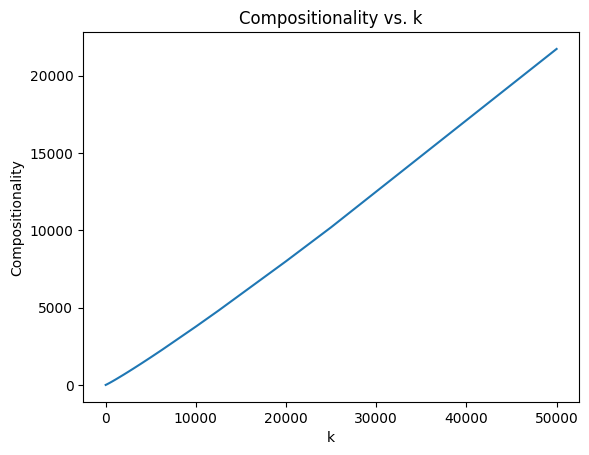

In [3]:
d=100000
vocab_size=100
noise_level=0.1

compositionalities = []
ks = []
for k in range(1,d):
    if d % k != 0: # skip non-divisible k
        continue 
    data_gen = UniformDataGenerator(k=k, d=d, vocab_size=vocab_size)
    w, z = data_gen.sample(10)
    compositionalities.append(data_gen.compositionality(z, w))
    ks.append(k)

plt.title("Compositionality vs. k")
plt.xlabel("k")
plt.ylabel("Compositionality")
plt.plot(ks, compositionalities)
plt.show()

Seems to be linear w.r.t. $k$


## Experiment 2 - Vary d (dimensionality of final representation)

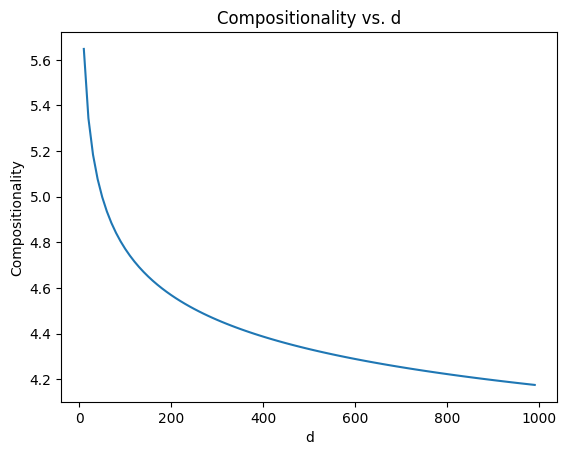

In [4]:

vocab_size=100
noise_level=0.1
k = 10
compositionalities = []
ds = []
for d in range(1, 1000):
    if d % k != 0: # skip non-divisible k
        continue 
    data_gen = UniformDataGenerator(k=k, d=d, vocab_size=vocab_size)
    w, z = data_gen.sample(10)
    compositionalities.append(data_gen.compositionality(z, w))
    ds.append(d)

plt.title("Compositionality vs. d")
plt.xlabel("d")
plt.ylabel("Compositionality")
plt.plot(ds, compositionalities)
plt.show()

#### Results


## Experiment 3 - Vary v (size of vocabulary)

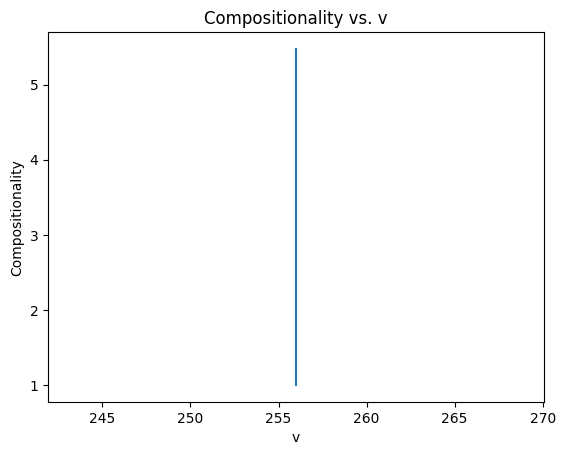

In [5]:
d = 256
noise_level=0.1
k = 10
compositionalities = []
vs = []
for v in range(1, 1000):
    data_gen = UniformDataGenerator(k=k, d=d, vocab_size=v)
    w, z = data_gen.sample(10)
    compositionalities.append(data_gen.compositionality(z, w))
    vs.append(d)

plt.title("Compositionality vs. v")
plt.xlabel("v")
plt.ylabel("Compositionality")
plt.plot(vs, compositionalities)
plt.show()

#### Results
Seems to be constant w.r.t. $v$